# Convolution Visualizer

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import PIL.Image

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet')

In [3]:
output_layers = [
'conv_pw_1_relu',
'conv_pw_2_relu',
'conv_pw_3_relu',
'conv_pw_4_relu',
'conv_pw_5_relu',
'conv_pw_6_relu',
'conv_pw_7_relu',
'conv_pw_8_relu',
'conv_pw_9_relu',
'conv_pw_10_relu',
'conv_pw_11_relu',
'conv_pw_12_relu',
]

outputs = {name: mobilenet.get_layer(name).output for name in output_layers}

model = tf.keras.Model(inputs=[mobilenet.input], outputs=outputs)
model.save('./models/conv_visualizer.h5')



In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_graph_model './models/conv_visualizer.h5' './tfjs_models/conv_visualizer' 

In [17]:
import os
import boto3

directory = f'./tfjs_models/conv_visualizer'
s3_client = boto3.client('s3')

for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    filename = f.split('/')[-1]
    s3_client.upload_file(
      f,
      'built-model-repository',
      f'conv_visualizer/{filename}',
      ExtraArgs={'ACL': 'public-read'}
    )

In [4]:
def load_img(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, (224,224))
  img = img[tf.newaxis, :]
  return img

def tensor_to_image(tensor):
  tensor = ((tensor.numpy()) * 255)
  tensor = tensor.astype(np.uint8)
  if np.ndim(tensor)>3:
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


(1, 224, 224, 3)


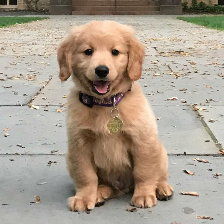

In [5]:
im = load_img('./dog.jpg')
print(im.shape)
tensor_to_image(im)

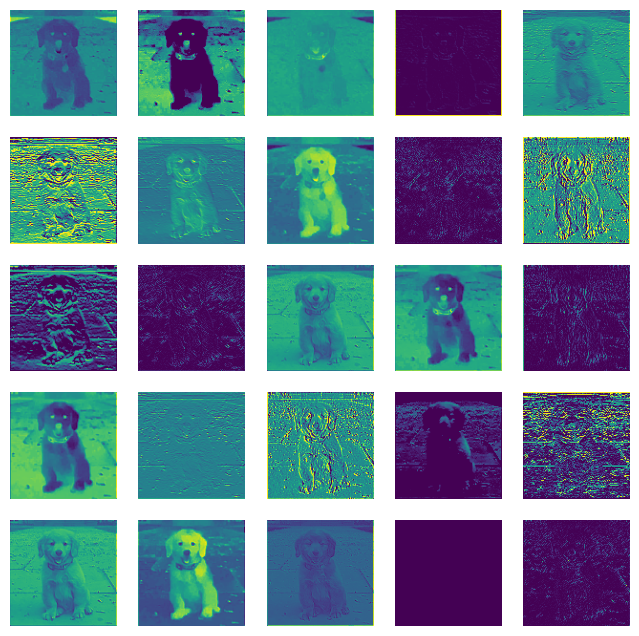

In [9]:
filters = tf.transpose(tf.squeeze(model(im)['conv_pw_1_relu']), perm=[2,0,1])

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    filter = filters[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(filter)
plt.show()

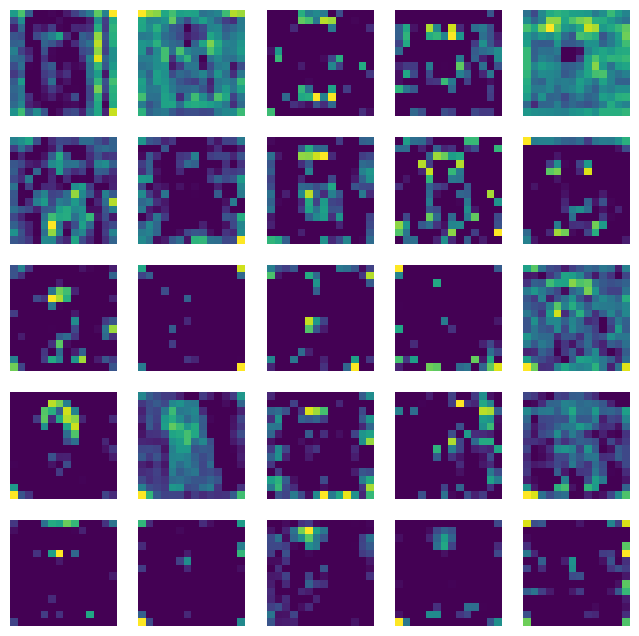

In [10]:
filters = tf.transpose(tf.squeeze(model(im)['conv_pw_10_relu']), perm=[2,0,1])

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    filter = filters[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(filter)
plt.show()